In [11]:
import mglearn

In [2]:
pip install python3.7 setup.ru

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python3.7 (from versions: none)
ERROR: No matching distribution found for python3.7


In [1]:
pip --version

pip 21.2.4 from C:\Users\admin\nns\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression
from sklearn.linear_model import TheilSenRegressor, RANSACRegressor, HuberRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from catboost import CatBoostRegressor

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205
9,9,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.381768,28.763565,3519.43131


In [4]:
train.drop('id', axis = 1, inplace = True)
train.head(10)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205
9,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.381768,28.763565,3519.43131


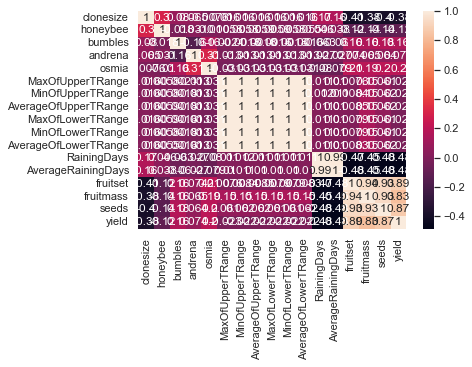

In [5]:
correlation = train.corr()
sns.heatmap(correlation,annot = True)
? sns.heatmap

In [6]:
X = train.copy().drop(columns = ["MaxOfUpperTRange","MinOfUpperTRange","MaxOfLowerTRange","MinOfLowerTRange"])
y = X.pop('yield')

seed = 42
splits = 5
k = KFold(n_splits = splits, random_state = seed, shuffle = True)

np.random.seed(seed)

In [9]:
model=CatBoostRegressor(depth=7,learning_rate=0.28,iterations=60)
mae=make_scorer(mean_absolute_error)
res=cross_val_score(model, X, y, cv=k, verbose=0, scoring=mae)
res.mean()

0:	learn: 1068.6643462	total: 26.5ms	remaining: 1.56s
1:	learn: 885.1030385	total: 52.2ms	remaining: 1.51s
2:	learn: 768.4380017	total: 79ms	remaining: 1.5s
3:	learn: 690.9719761	total: 99.7ms	remaining: 1.4s
4:	learn: 641.9557116	total: 113ms	remaining: 1.25s
5:	learn: 614.3642695	total: 129ms	remaining: 1.17s
6:	learn: 596.7664135	total: 147ms	remaining: 1.11s
7:	learn: 586.3598207	total: 171ms	remaining: 1.11s
8:	learn: 579.5159953	total: 185ms	remaining: 1.05s
9:	learn: 574.4506210	total: 200ms	remaining: 999ms
10:	learn: 570.7784710	total: 216ms	remaining: 961ms
11:	learn: 567.7766911	total: 237ms	remaining: 947ms
12:	learn: 565.6450163	total: 270ms	remaining: 977ms
13:	learn: 563.9920283	total: 286ms	remaining: 940ms
14:	learn: 563.1797394	total: 303ms	remaining: 909ms
15:	learn: 561.8896449	total: 318ms	remaining: 873ms
16:	learn: 561.0055875	total: 332ms	remaining: 839ms
17:	learn: 559.4501509	total: 359ms	remaining: 838ms
18:	learn: 558.8421278	total: 378ms	remaining: 815ms
19

43:	learn: 536.1749453	total: 1.1s	remaining: 402ms
44:	learn: 535.6197648	total: 1.12s	remaining: 375ms
45:	learn: 534.5221065	total: 1.15s	remaining: 349ms
46:	learn: 533.5458424	total: 1.17s	remaining: 323ms
47:	learn: 533.2385007	total: 1.18s	remaining: 296ms
48:	learn: 532.5823840	total: 1.2s	remaining: 270ms
49:	learn: 531.5947191	total: 1.22s	remaining: 244ms
50:	learn: 530.7725465	total: 1.24s	remaining: 218ms
51:	learn: 530.7136555	total: 1.26s	remaining: 194ms
52:	learn: 529.8034509	total: 1.27s	remaining: 168ms
53:	learn: 529.1720805	total: 1.3s	remaining: 145ms
54:	learn: 527.7613865	total: 1.34s	remaining: 122ms
55:	learn: 527.5654395	total: 1.36s	remaining: 97ms
56:	learn: 526.9062739	total: 1.38s	remaining: 72.4ms
57:	learn: 526.1357386	total: 1.39s	remaining: 48ms
58:	learn: 525.6463328	total: 1.41s	remaining: 24ms
59:	learn: 525.1014851	total: 1.44s	remaining: 0us
0:	learn: 1068.4900051	total: 29.6ms	remaining: 1.75s
1:	learn: 884.1670521	total: 62.3ms	remaining: 1.81s

360.4817485533577

In [8]:
model3 = GradientBoostingRegressor()
    
mae=make_scorer(mean_absolute_error)
res3=cross_val_score(model3, X, y, cv=k, verbose=0,scoring=mae) #
#print(model.coef_ )
res.mean()

352.47392574257736

Итого, бейзлайн 356.2251488269169

Задача: получить значение меньше 350

In [297]:
answer = VotingRegressor([res,res2,res3])

In [299]:
final = cross_val_score(answer, X, y,scoring=mae)
final.mean()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/maxvelichko26/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maxvelichko26/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_voting.py", line 598, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/maxvelichko26/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_voting.py", line 73, in fit
    names, clfs = self._validate_estimators()
  File "/Users/maxvelichko26/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py", line 282, in _validate_estimators
    names, estimators = zip(*self.estimators)
ValueError: too many values to unpack (expected 2)
